In [26]:
import do_functions as do
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')

Preguntes: 
2. Encara no he netejar el flight_comb, alguna línea de codi per fer-ho ràpidament? 

In [2]:
df = do.read_and_merge('paz_metadata_actualitzat.pkl',
                       'paz_profiles_actualitzat.pkl')
df = do.clean_dataframe(df)

For the avg_dphi h010 - h100 :
Optimal threshold: = 2.01
F1score: 0.609



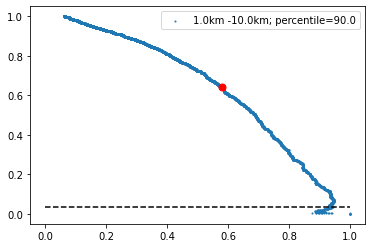

In [3]:
#PrecisionRecall curve for dphi average between 1 and 10km
# and truth threshold of 9.58mm (=0.3 on normalized data)
do.plotPrecisionRecall(df,1.0,10.0,0.90)


For the avg_dphi h001 - h084 :
Optimal threshold: = 2.5
F1score: 0.61

For the avg_dphi h020 - h200 :
Optimal threshold: = 1.05
F1score: 0.576

For the avg_dphi h080 - h090 :
Optimal threshold: = 1.28
F1score: 0.455



([<matplotlib.axis.YTick at 0x7fb90e120160>,
 [Text(0, 0, '0'), Text(0, 1, '1.0')])

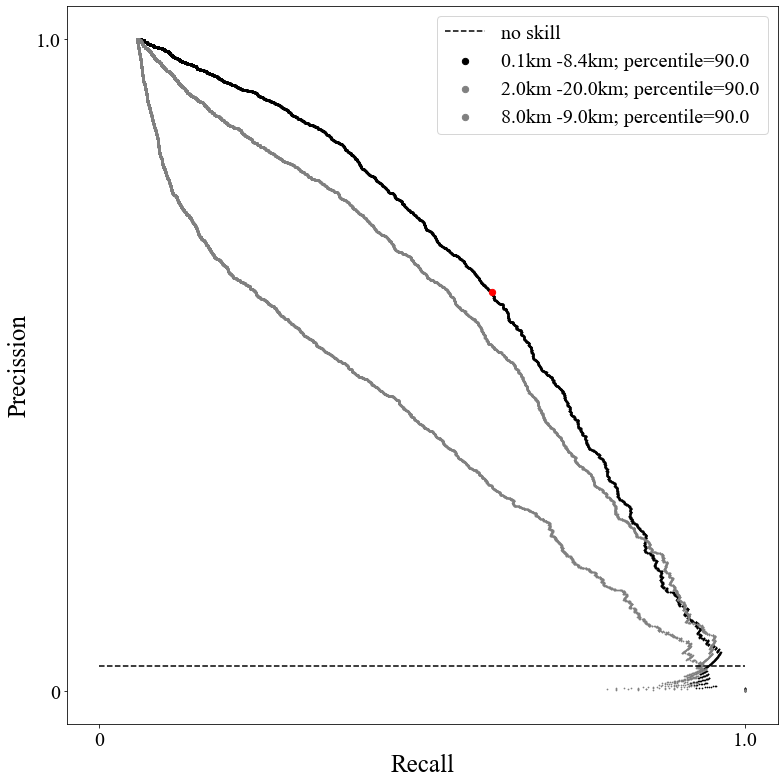

In [71]:
p1,r1,p11,r11,truth,label1 = do.getPrecisionRecall(df,0.1,8.4,0.90)
no_skill = len(truth[truth==1]) / len(truth)

p2,r2,p22,r22,truth2,label2 = do.getPrecisionRecall(df,2.0,20.0,0.90)
p3,r3,p33,r33,truth3,label3 = do.getPrecisionRecall(df,8.0,9.0,0.90)

plt.figure(figsize=(11,11), tight_layout=True)

plt.scatter(p1,r1,label=label1,s=0.5,c='black')
plt.scatter(p11,r11,s=40,c='r')

plt.scatter(p2,r2,label=label2,s=0.5,c='gray')

plt.scatter(p3,r3,label=label3,s=0.5,c='gray')

plt.plot([0, 1], [no_skill, no_skill], linestyle='--', c='black',label='no skill')


lgnd = plt.legend(scatterpoints=1,
                  prop= FontProperties(family='Times New Roman',style='normal', size=20))

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]
lgnd.legendHandles[3]._sizes = [40]

plt.xlabel('Recall', 
           fontproperties=font,
           fontsize=25)
plt.ylabel('Precission',
           fontproperties=font,
           fontsize=25)

plt.xticks(ticks=[0,1], 
           labels=['0','1.0'],
           fontproperties=font, 
           fontsize=20)
plt.yticks(ticks=[0,1], 
           labels=['0','1.0'],
           fontproperties=font, 
           fontsize=20)

In [ ]:
initial = [0.1,0.5,1.0,2.0]
final = [0.5,1.0,5.0,10.0]

for hi in initial:
    for hf in final:
        do.plotPrecisionRecall(df,hi,hf,0.01)


In [ ]:
for hi in initial:
    for hf in final:
        do.plotPrecisionRecall(df,hi,hf,0.1)

In [ ]:
for hi in initial:
    for hf in final:
        do.plotPrecisionRecall(df,hi,hf,0.3)

In [ ]:
for hi in initial:
    for hf in final:
        do.plotPrecisionRecall(df,hi,hf,0.5)

In [ ]:
for hi in initial:
    for hf in final:
        do.plotPrecisionRecall(df,hi,hf,0.7)